# Softmax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Funciones

# Funciones de Softmax Regression

## Softmax

$$ \phi_{softmax}(z^{i}) = \frac{\exp^{z^{(i)}}}{\sum^{k}_{j=0} \exp^{z^{(i)}_{k}} } $$

## Costo

$$J(W) = \frac{1}{n}\sum^{n}_{i=0} H(T_i ,O_i)$$

## Cross entropy

$$ H(T_i ,O_i) = - \sum_m T_i * log(O_i)$$

## Gradiente

$$\nabla{w_{j}} J(W) = - \frac{1}{n} \sum^{n}_{i=0} [x^{(i)}(T_i  - O_i)] $$


In [2]:
def predict(x, w):
    return (np.dot(x,w))

In [3]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [4]:
def label_predictions(vect_inputs):
    return vect_inputs.argmax(axis=1)

In [5]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

In [6]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

In [7]:
def optimizar(x_train, smax, y_enc):
    return - np.dot(x_train.T, (y_enc - smax))

In [8]:
iris = datasets.load_iris()

In [9]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [10]:
for i in range(x.shape[1]):
    mean = x[:,i].mean()
    deviation =  x[:,i].std()
    x[:,i] = (x[:,i] - mean) / deviation

# Implementacion del modelo

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
x_train = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

In [13]:
x_train.shape[1]

5

In [14]:
y_enc = (np.arange(np.max(y_train.flatten()) + 1) == y_train.flatten()[:, None]).astype(float)

y_enc[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
x_train.shape

(112, 5)

In [16]:
theta_set = np.random.rand(1,x_train.shape[1])
theta_ver = np.random.rand(1,x_train.shape[1])    
theta_vir = np.random.rand(1,x_train.shape[1])
theta_all = np.concatenate((theta_set,theta_ver,theta_vir)).reshape(x_train.shape[1],3)


eta = 0.001
max_iter = 20000
cost_smax = []
for i in range(0, max_iter):
    vector_pos_train = predict(x_train, theta_all)
    
    smax = softmax(vector_pos_train)
    theta_all =  theta_all - eta*(optimizar(x_train, smax, y_enc))
    J_cost = cost(smax, y_enc)
    cost_smax.append(J_cost)

theta_all

array([[ 0.18901175,  6.39463136, -4.33863799],
       [-2.12522116,  2.05788564,  0.98675404],
       [ 3.24732259,  0.29597574, -1.83611169],
       [-4.56649446, -0.5274887 ,  6.17571405],
       [-4.29238767, -2.08802492,  7.21497399]])

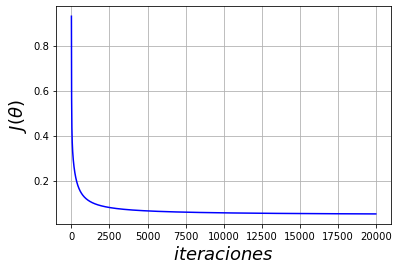

In [17]:
plt.plot(np.arange(max_iter), cost_smax, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [18]:
vector_pos_test = predict(x_test, theta_all)
    
smax_pred = softmax(vector_pos_test)

y_pred = label_predictions(smax_pred)

y_pred

array([0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1], dtype=int64)

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 17]], dtype=int64)

In [20]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

1.0

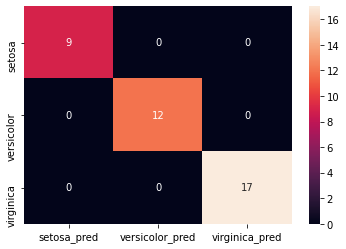

In [21]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [22]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
print(classification_report(y_test,  y_pred, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

